# KNN From Scratch on Iris Dataset
The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.
### Importing Libraries

In [23]:
import numpy as np
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import math

### Calling Dataset

In [31]:
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

### Euclidian Distance Function

In [25]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    sum_squared_distance = 0
    for i in range(len(instance1)):
        sum_squared_distance += math.pow(instance1[i] - instance2[i], 2)
    return math.sqrt(sum_squared_distance)
    # return np.linalg.norm(instance1 - instance2)


### Finding Neghibours Function

In [26]:
def get_neighbors(training_set,labels,test_instance,k=5,distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    training_set : training data for KNN
    labels : training labels
    test_instance : instance to be tested on
    distance : funtion to get distances
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where, 
        index    is the index from the training_set, 
        dist     is the distance between the test_instance and the 
             instance training_set[index]
        distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return(neighbors)

### Vote Function

In [27]:
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

### Spliting data into training and testing

In [28]:
np.random.seed(0)
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]

### Visualising the Data on 3D plot

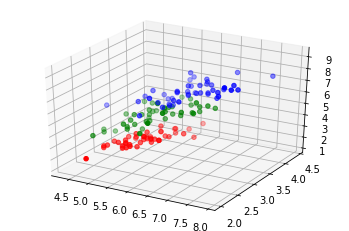

In [29]:
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))

colours = ("r", "g", "b")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

### Calculating neighbours using KNN algorithm at particular instance

In [30]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , result of vote:  0 , label:  0 , data:  [5.1 3.4 1.5 0.2]
index:  1 , result of vote:  1 , label:  1 , data:  [6.6 2.9 4.6 1.3]
index:  2 , result of vote:  1 , label:  1 , data:  [5.6 3.  4.1 1.3]
index:  3 , result of vote:  2 , label:  1 , data:  [5.9 3.2 4.8 1.8]
index:  4 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  5 , result of vote:  0 , label:  0 , data:  [5.5 3.5 1.3 0.2]
index:  6 , result of vote:  0 , label:  0 , data:  [5.1 3.7 1.5 0.4]
index:  7 , result of vote:  0 , label:  0 , data:  [4.9 3.1 1.5 0.1]
index:  8 , result of vote:  2 , label:  2 , data:  [6.3 2.9 5.6 1.8]
index:  9 , result of vote:  1 , label:  1 , data:  [5.8 2.7 4.1 1. ]
index:  10 , result of vote:  2 , label:  2 , data:  [7.7 3.8 6.7 2.2]
index:  11 , result of vote:  0 , label:  0 , data:  [4.6 3.2 1.4 0.2]
